In [49]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [50]:
data = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t',quoting=3)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [52]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [53]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [54]:
data.shape

(1000, 2)

In [55]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [56]:
data.describe(include='object').T

,count,unique,top,freq
Review,1000,996,I would not recommend this place.,2


In [57]:
data['Length'] = data['Review'].apply(len)

In [58]:
data.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [59]:
data.tail()

,Review,Liked,Length
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91
999,"Then, as if I hadn't wasted enough of my life ...",0,134


In [60]:
data.describe()

,Liked,Length
count,1000.00000,1000.000000
mean,0.50000,58.315000
std,0.50025,32.360052
min,0.00000,11.000000
25%,0.00000,33.000000
50%,0.50000,51.000000
75%,1.00000,80.000000
max,1.00000,149.000000


In [61]:
data['Liked'].value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

# EDA

In [62]:
import nltk
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\k.vinod
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
# these are the stopwords which shouldn't include in the data

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
# Puncuation marks shouldn't include in the data
[p for p in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [65]:
def text_processor(msg):
  # remove special symbols
  nopun = [char for char in msg if char not in string.punctuation]
  nopun = ''.join(nopun)

  # stemming the text
  ps = PorterStemmer()
  nopun = ps.stem(nopun)

  # converting to lowercase
  nopun = nopun.lower()

  # returning the sentence without stopwords
  return ' '.join([word for word in nopun.split() if word not in stopwords.words('english')])

In [66]:
print(text_processor('Wow... Loved this place.'))
print(text_processor('I am Running in THE ROAD for a.. CAuseing'))

wow loved plac
running road caus


In [67]:
#dataset before applying text_processor

data.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [68]:
data['Tokenized_text'] = data['Review'].apply(text_processor)

In [69]:
# dataset after applying text_processor
data.head()

,Review,Liked,Length,Tokenized_text
0,Wow... Loved this place.,1,24,wow loved plac
1,Crust is not good.,0,18,crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasti
3,Stopped by during the late May bank holiday of...,1,87,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great pric


In [70]:
data[data['Length']==90]['Review'].iloc[0]

'He came running after us when he realized my husband had left his sunglasses on the table.'

In [71]:
data[data['Length']==90]['Tokenized_text'].iloc[0]

'came running us realized husband left sunglasses'

# visualization

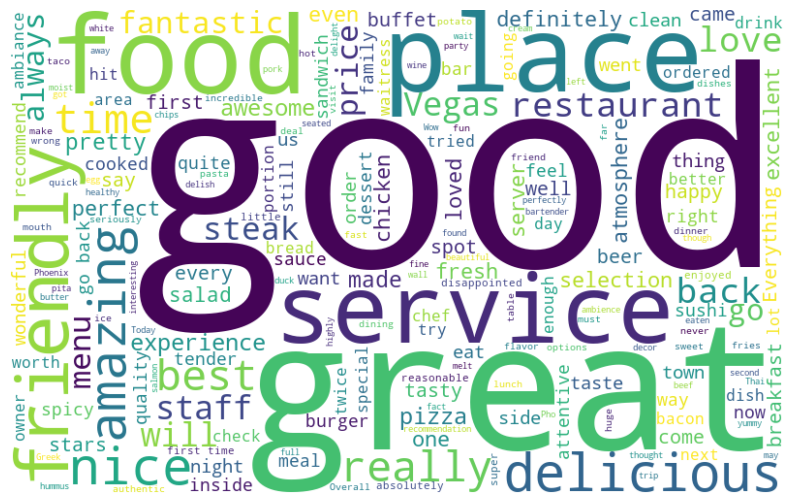

In [72]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a word clouds with postive word
text = data.loc[data['Liked']==1,:]
pos_word = ' '.join([text for text in text['Review']])

# wordcloud
word_cloud = WordCloud(width=800, height=500, background_color='white').generate(pos_word)

# visulaize
plt.figure(figsize=(10,8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

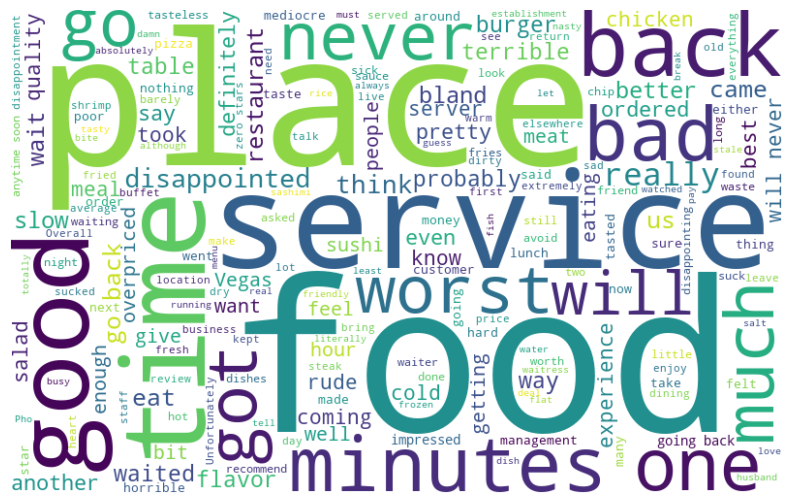

In [73]:
text2 = data.loc[data['Liked']==0,:]
neg_text = ' '.join([text for text in text2['Review']])

word_cloud2 = WordCloud(width=800, height=500, background_color='white').generate(neg_text)

plt.figure(figsize=(10,8))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [74]:
# creating the bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)

X = cv.fit_transform(data['Tokenized_text']).toarray()
y = data.iloc[:, 1].values

In [75]:
import seaborn as sns

sns

<module 'seaborn' from 'c:\\Users\\k.vinod kumar\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\seaborn\\__init__.py'>

# Spliting Data

In [76]:
# Here we spliting the data as training data = 80% and test data = 20%
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=0)

# Training model

***Naive Bayes MultinomialNB***

In [77]:
# we are using MultiNominalNB
from sklearn.naive_bayes import MultinomialNB

MN_model = MultinomialNB()

MN_model.fit(X_train, y_train)

y_pred = MN_model.predict(X_val)

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print('--------Scores--------')
print("The Accuracy Score using MultinomialNB model : {}%".format(round(accuracy*100,2)))
print('The Presicion Score using MultinomialNB model : {}%'.format(round(precision*100,2)))
print('The Recall Score using MunltinomialNB model : {}%'.format(round(recall*100,2)))

--------Scores--------
The Accuracy Score using MultinomialNB model : 74.5%
The Presicion Score using MultinomialNB model : 73.64%
The Recall Score using MunltinomialNB model : 78.64%


In [79]:
# accuracy measure using classification report
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        97
           1       0.74      0.79      0.76       103

    accuracy                           0.74       200
   macro avg       0.75      0.74      0.74       200
weighted avg       0.75      0.74      0.74       200



***Random forest classifier***

In [80]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

RF_model.fit(X_train, y_train)

RF_pred = RF_model.predict(X_val)

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_val, RF_pred))

              precision    recall  f1-score   support

           0       0.63      0.78      0.70        97
           1       0.74      0.57      0.64       103

    accuracy                           0.68       200
   macro avg       0.69      0.68      0.67       200
weighted avg       0.69      0.68      0.67       200



***Logistic Regression***

In [82]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()

LR_model.fit(X_train, y_train)

LogisticRegression()

In [83]:
LR_pred = LR_model.predict(X_val)

In [84]:
LR_acc = accuracy_score(y_val, LR_pred)
LR_precision = precision_score(y_val, LR_pred)
LR_recall = recall_score(y_val, LR_pred)
print('------ Score ------')
print('The accuracy score of model using Logistic Regression = {}%'.format(round(LR_acc*100,2)))
print('The precision score of model using Logistic Regression = {}%'.format(round(LR_precision*100,2)))
print('The recall score of model using Logistic Regression = {}%'.format(round(LR_recall*100,2)))

------ Score ------
The accuracy score of model using Logistic Regression = 76.0%
The precision score of model using Logistic Regression = 83.13%
The recall score of model using Logistic Regression = 66.99%


In [85]:
print(classification_report(y_val, LR_pred))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78        97
           1       0.83      0.67      0.74       103

    accuracy                           0.76       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.76      0.76       200



# TF-IDF

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer

TF_model = TfidfVectorizer(max_features=1500)

X1 = TF_model.fit_transform(data['Tokenized_text']).toarray()
y1 = data.iloc[:, 1].values

In [87]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [88]:
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, random_state=0)

In [89]:
# we are using MultiNominalNB
from sklearn.naive_bayes import MultinomialNB

MN1_model = MultinomialNB()

MN1_model.fit(X1_train, y1_train)

MultinomialNB()

In [90]:
# prediction

y1_pred = MN_model.predict(X1_val)

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy1 = accuracy_score(y1_val, y1_pred)
precision1 = precision_score(y1_val, y1_pred)
recall1 = recall_score(y1_val, y1_pred)

print('--------Scores--------')
print("The Accuracy Score using MultinomialNB model : {}%".format(round(accuracy1*100,2)))
print('The Presicion Score using MultinomialNB model : {}%'.format(round(precision1*100,2)))
print('The Recall Score using MunltinomialNB model : {}%'.format(round(recall1*100,2)))

--------Scores--------
The Accuracy Score using MultinomialNB model : 78.8%
The Presicion Score using MultinomialNB model : 79.41%
The Recall Score using MunltinomialNB model : 81.2%


In [92]:
# accuracy measure using classification report
from sklearn.metrics import classification_report

print(classification_report(y1_val, y1_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       117
           1       0.79      0.81      0.80       133

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



In [93]:
from sklearn.ensemble import RandomForestClassifier

RF_model1 = RandomForestClassifier()

RF_model1.fit(X1_train, y1_train)

RF_pred1 = RF_model1.predict(X1_val)

In [94]:
from sklearn.metrics import classification_report

print(classification_report(y1_val, RF_pred1))

              precision    recall  f1-score   support

           0       0.64      0.92      0.76       117
           1       0.89      0.55      0.68       133

    accuracy                           0.72       250
   macro avg       0.77      0.74      0.72       250
weighted avg       0.77      0.72      0.72       250



In [95]:
from sklearn.linear_model import LogisticRegression

LR_model1 = LogisticRegression()

LR_model1.fit(X1_train, y1_train)

LogisticRegression()

In [96]:
LR_pred1 = LR_model1.predict(X1_val)

In [97]:
LR_acc1 = accuracy_score(y1_val, LR_pred1)
LR_precision1 = precision_score(y1_val, LR_pred1)
LR_recall1 = recall_score(y1_val, LR_pred1)
print('------ Score ------')
print('The accuracy score of model using Logistic Regression = {}%'.format(round(LR_acc1*100,2)))
print('The precision score of model using Logistic Regression = {}%'.format(round(LR_precision1*100,2)))
print('The recall score of model using Logistic Regression = {}%'.format(round(LR_recall1*100,2)))

------ Score ------
The accuracy score of model using Logistic Regression = 75.6%
The precision score of model using Logistic Regression = 85.29%
The recall score of model using Logistic Regression = 65.41%


In [98]:
print(classification_report(y1_val, LR_pred1))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77       117
           1       0.85      0.65      0.74       133

    accuracy                           0.76       250
   macro avg       0.77      0.76      0.76       250
weighted avg       0.78      0.76      0.75       250



# Hyperparameter Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'alpha' : [0.1, 0.5, 1.0, 5.0]
}

clf = MultinomialNB()

grid_search = GridSearchCV(clf, param_grid, cv=6)
grid_search.fit(X1_train,y1_train)

GridSearchCV(cv=6, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0]})

In [100]:
grid_search.best_params_

{'alpha': 1.0}

In [101]:
MN_model = MultinomialNB(alpha=1.0)

MN_model.fit(X1_train, y1_train)

MN_pred = MN_model.predict(X1_val)

print(classification_report(y1_val, MN_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       117
           1       0.79      0.76      0.77       133

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.77      0.76      0.76       250



In [102]:
import pickle

with open('MN_model.pkl','wb') as f:
  pickle.dump(MN1_model, f)

# Result
As the MultinomialNB of navies bayes is working well by apply TF-IDF. The results are:

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       117
           1       0.79      0.81      0.80       133

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250


Accuracy of model is 79%
